# Project Background

This project is part of Codecademy's Machine Learning curriculum. Below is Codecademy's description and objectives for the project:

>*In this portfolio project, you will analyze some data from OKCupid, an app that focuses on using multiple choice and short answers to match users.*

>*You will also create a presentation about your findings from this OKCupid dataset.*

>*The purpose of this project is to practice formulating questions and implementing machine learning techniques to answer those questions. However, the questions you ask and how you answer them are entirely up to you.*

# Introduction

This project analyzes data from on-line dating application OKCupid. In recent years, there has been a massive rise in the usage of dating apps to find love. Many of these apps use sophisticated data science techniques to recommend possible matches to users and to optimize the user experience. These apps give us access to a wealth of information that we've never had before about how different people experience romance.

The goal of this project is to scope, prep, and analyze OKCupid data, and then create a machine learning model to solve a question.


**Data sources:**

`profiles.csv` was provided by Codecademy.

## Scoping

It is beneficial to create a project scope whenever starting a new project. Below are the four sections that will guide the project's progress:

1. The first section is defining **Project Goals**. In this section we define high-level objectives and set the intentions for this project. 
2. The second section is **Data Gathering and Preperation**. In this project the data has already been provided, but we still need to check if project goals can be achieved with the available data. 
3. The third section is **Analysis**. In this section we will analyze the data and determine which data science methods to use to answer the project's questions and complete our goals. 
4. The fourth section is **Evaluation**. During this step we will help determine findings from the analysis and articulate our conclusions.

# Project Goals

The primary goal of this project is to utilize Python analysis and apply machine learning techniques to a data set in order to answer a research qestion. The research question that will be answered is whether an OkCupid user's astrological sign ("sign") can be predicted using other variables from their profiles. Many OKCupid users believe there is a correlation between astrological signs and dating compatability, but not all OKCupid users submit their astrological sign when creating their user profiles. Therefore if a user does not update their sign on their profile, OkCupid would like to predict which sign they might be.

# Data Gathering and Preperation

This project uses one dataset, provided by Codecademy, called `profiles.csv`. In the CSV file each row represents an OkCupid user. The columns are the responses to their user profiles which include multi-choice and short answer questions.

### Import Python Modules

First import the modules being used for this project:

In [1]:
## General libraries
import numpy as npl
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [6, 6]
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Loading the Data

To analyze the user profiles from OkCupid, pandas will be used to load the dataset into a `DataFrame` so that it can be explored and visualized with Python.

Here `profiles.csv` is loaded into a `DataFrame` called `profiles`. The `DataFrame` is then briefly examined using `.head()` to check the contents. 

In order to further summarize the dataset we'll use `.columns` and `.info()`.

In [2]:
profiles = pd.read_csv('profiles.csv', encoding='utf-8')
profiles.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [3]:
# display the columns in the dataframe
print(profiles.columns)

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')


In [4]:
# information about dataframe
print(profiles.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

###  Data Characteristics

The dataset `profiles` has 59,946 rows and 31 columns. 

Additionally, we can see that OKCupid does not require values in most of the fields in a user's profile. Only 7 of the 31 fields have 59,946 non-null values: `age`, `income`, `last_online`, `location`, `orientation`, `sex`, and `status`.

Below is a description of each field - 20 are Quantitative or Categorical variables, 1 is a date field, and the other 10 fields are text answers to short essays:

- **age:** continuous variable of age of user
- **body_type:** categorical variable of body type of user
- **diet:** categorical variable of dietary information
- **drinks:**  categorical variable of alcohol consumption
- **drugs:** categorical variable of drug usage
- **education:** categorical variable of educational attainment
- **ethnicity:** categorical variable of ethnic backgrounds
- **height:** continuous variable of height of user
- **income:** continuous variable of income of user
- **job:** categorical variable of employment description
- **offspring:** categorical variable of children status
- **orientation:** categorical variable of sexual orientation
- **pets:** categorical variable of pet preferences
- **religion:** categorical variable of religious background
- **sex:** categorical variable of gender
- **sign:** categorical variable of astrological symbol
- **smokes:** categorical variable of smoking consumption
- **speaks:** categorical variable of language spoken
- **status:** categorical variable of relationship status
- **last_online:** date variable of last login
- **location:** categorical variable of user locations

And a set of open short-answer responses to :

- **essay0:** My self summary
- **essay1:**  What I’m doing with my life
- **essay2:** I’m really good at
- **essay3:** The first thing people usually notice about me
- **essay4:** Favorite books, movies, show, music, and food
- **essay5:** The six things I could never do without
- **essay6:** I spend a lot of time thinking about
- **essay7:** On a typical Friday night I am
- **essay8:** The most private thing I am willing to admit
- **essay9:** You should message me if

# Analysis

The analysis uses descriptive statistics and data visualization to find key figures in understanding the distribution, count, and relationship between variables. Since the goal of the project is to make predictions on users' astrological sign, classification algorithms from the supervised learning family of machine learning models will be implemented.

### Data Exploration

First to be explored is the number of unique astronimcal signs, and the values. 

There are 48 unique values, but there should only be 12. Upon closer inspection, there seems to be qualifiers attached to some of the signs.

In [5]:
print("nnumber of categories:", profiles.sign.nunique())
print("categories:", profiles.sign.unique())

nnumber of categories: 48
categories: ['gemini' 'cancer' 'pisces but it doesn&rsquo;t matter' 'pisces'
 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'gemini but it doesn&rsquo;t matter' 'cancer but it doesn&rsquo;t matter'
 'leo but it doesn&rsquo;t matter' nan
 'aquarius but it doesn&rsquo;t matter'
 'aries and it&rsquo;s fun to think about'
 'libra but it doesn&rsquo;t matter'
 'pisces and it&rsquo;s fun to think about' 'libra'
 'taurus but it doesn&rsquo;t matter'
 'sagittarius but it doesn&rsquo;t matter' 'scorpio and it matters a lot'
 'gemini and it&rsquo;s fun to think about'
 'leo and it&rsquo;s fun to think about'
 'cancer and it&rsquo;s fun to think about'
 'libra and it&rsquo;s fun to think about'
 'aquarius and it&rsquo;s fun to think about'
 'virgo but it doesn&rsquo;t matter'
 'scorpio and it&rsquo;s fun to think about'
 'capricorn but it doesn&rsquo;t matter' 'scorpio'
 'capricorn and it&rsquo;s fun to think about' 'leo'
 'aries but it doesn&rsquo;t matter' 'aries'
 'scorp

### Clean Values in 'Sign'

It is important that we clean the values in the **'sign'** field since this is the variable what will be predicted, we are not interested in the qualifiers after the sign, and having 48 predictions would likely skew the results. 

By removing everything after the first word of the field, the signs can be saved without the qualifiers *(Note: the qualifiers can still be used for another problem down the line if needed)*.

In [6]:
profiles['signsCleaned'] = profiles.sign.str.split().str.get(0)
print("nnumber of categories:", profiles.signsCleaned.nunique())
print("categories:", profiles.signsCleaned.unique())

profiles.signsCleaned.value_counts()

nnumber of categories: 12
categories: ['gemini' 'cancer' 'pisces' 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'leo' nan 'aries' 'libra' 'scorpio' 'capricorn']


signsCleaned
leo            4374
gemini         4310
libra          4207
cancer         4206
virgo          4141
taurus         4140
scorpio        4134
aries          3989
pisces         3946
sagittarius    3942
aquarius       3928
capricorn      3573
Name: count, dtype: int64

## Continuous Variables

#### Age

The below plot shows the distribution of grouped ages in the **'age'** field. It seems that most users are in their late 20s to early 30s.

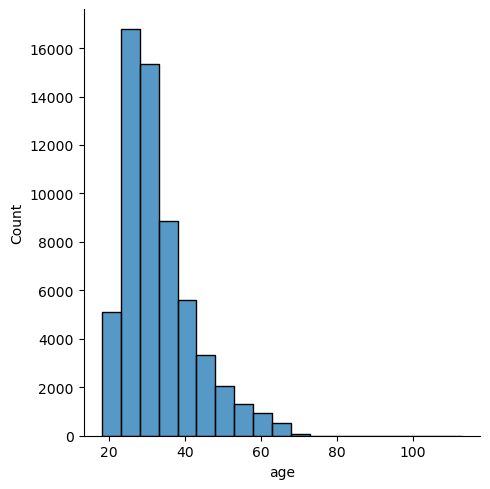

In [7]:
sns.displot(data=profiles, x="age", kind="hist", binwidth = 5);

#### Sex

Below is a similar age distribution chart, but broken down by the two values in **'sex'** - male (m) or female (f). The distributions of both sex values, grouped by age, are proportionally similar to eachother, but there are fewer female users then male users.

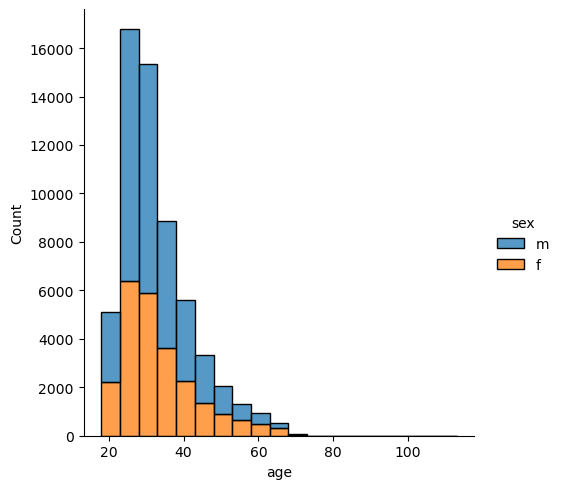

In [8]:
sns.displot(data=profiles, x="age", hue="sex", kind="hist", binwidth = 5, multiple = "stack");

#### Height

The two visuals below show the **`height`** variable, and also height in relation to sex. The majority of users are between 5 feet 5 feet tall and 6.5 feet tall, with males skewing toward being taller than females.

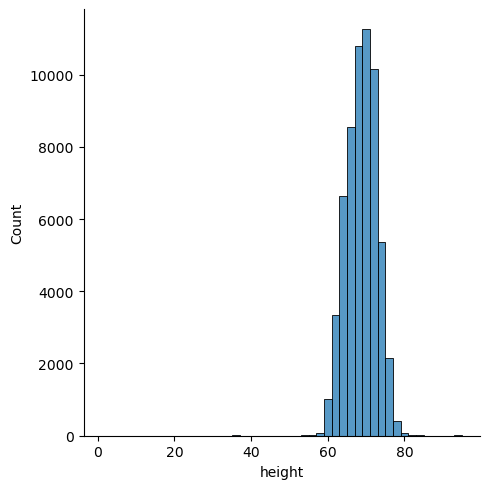

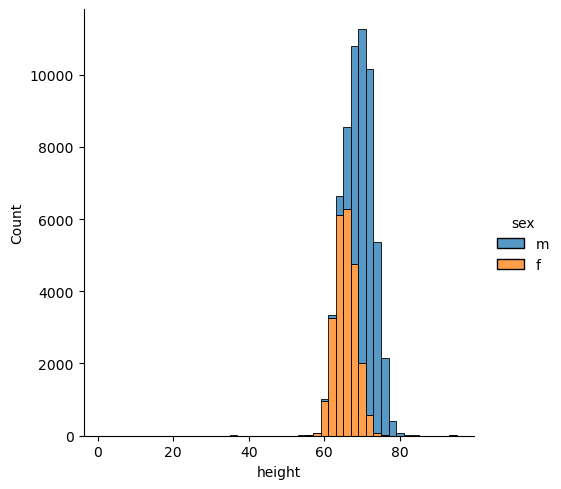

In [9]:
sns.displot(data=profiles, x="height", kind="hist", binwidth = 2);
sns.displot(data=profiles, x="height",hue="sex", kind="hist", binwidth = 2, multiple = "stack");

#### Income

The two visuals below show the **`income`** variable, and also income in relation to sex.

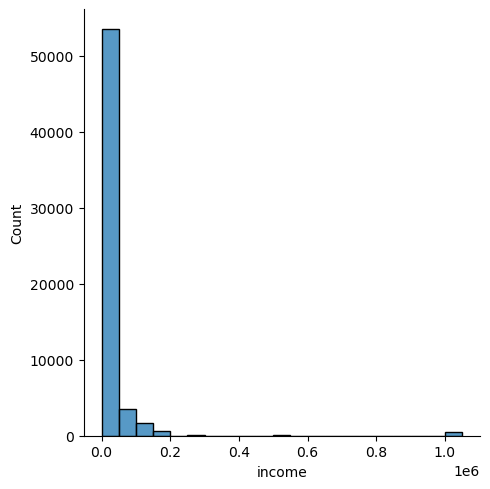

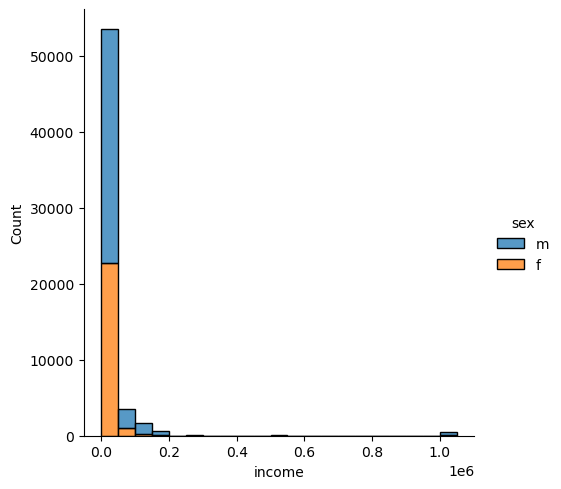

In [10]:
sns.displot(data=profiles, x="income", kind="hist", binwidth = 50000);
sns.displot(data=profiles, x="income", hue="sex", kind="hist", binwidth = 50000, multiple = "stack");

## Categorical Variables

#### Sex

As noted previously, there are more male OKCupid users in the dataset then female users. There are ~36,000 men to ~24,000 women.

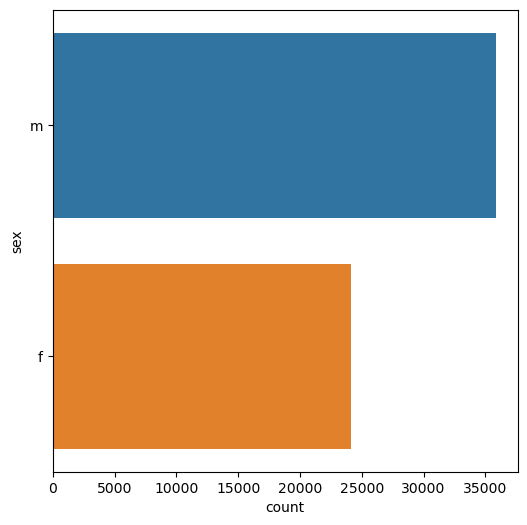

In [11]:
sns.countplot(data=profiles, y="sex");

#### Sign

The two visuals below show the **`sign`** variable, and astrological sign in relation to sex. 

The astrological signs are normally distributed. Additionally, astrological signs according to geners are also normally distributed, proporitional to the male-to-female ratio in the dataset.

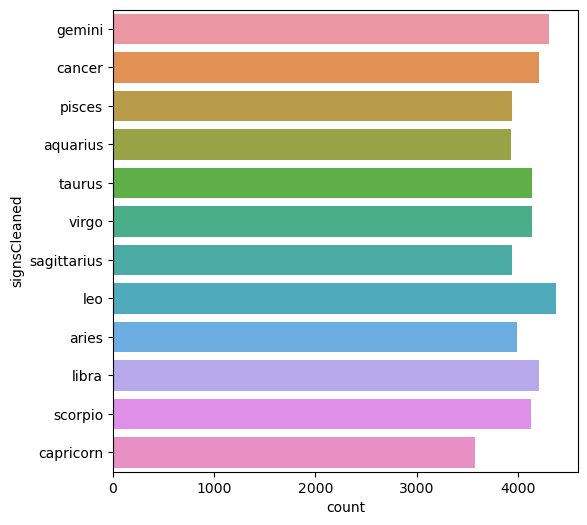

In [12]:
sns.countplot(data=profiles, y="signsCleaned");

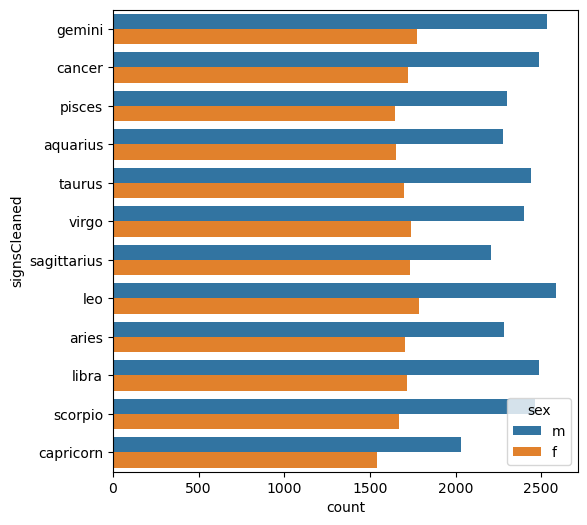

In [13]:
sns.countplot(data=profiles, y="signsCleaned", hue = "sex");

#### Body Type

The two visuals below show the **`body type`** variable, and body type in relation to sex. 

From an aggregate viewpoint most users describe themselves as average, fit, or athletic.

When including the sex variable it seems that some of the body type descriptions are skewed by gender. For example, "curvy" and "full figured" descriptions are skewed toward females, while the "athletic" description is skewed toward males.

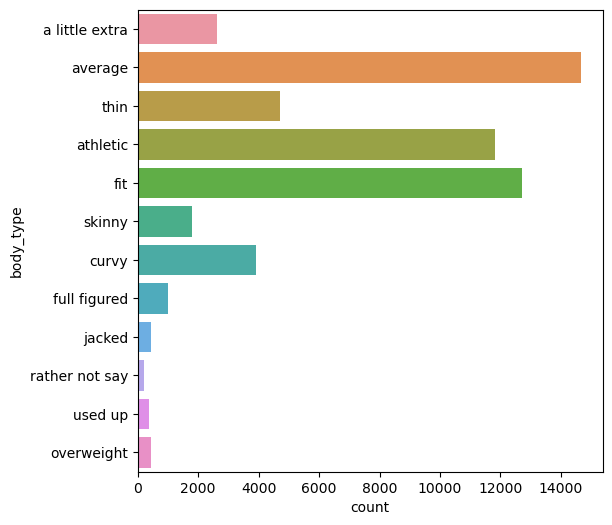

In [14]:
sns.countplot(data=profiles, y="body_type");

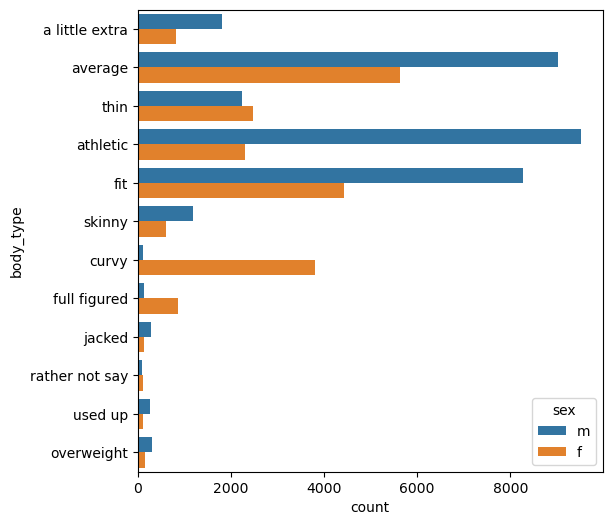

In [15]:
sns.countplot(data=profiles, y="body_type", hue = "sex");

### Diet, Drinks, Drugs, Educations, Jobs, Offspring, Orientation, Pets, Religion, Smoking, and Status

The below volume plots will visualize the remaining categorical variables - Diet, Drinks, Drugs, Educations, Jobs, Offspring, Orientation, Pets, Religion, Smoking, and Status.

#### Diet

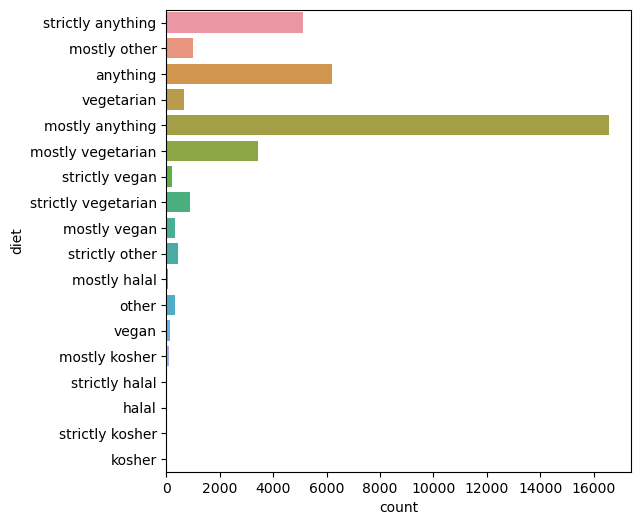

In [16]:
sns.countplot(data=profiles, y="diet");

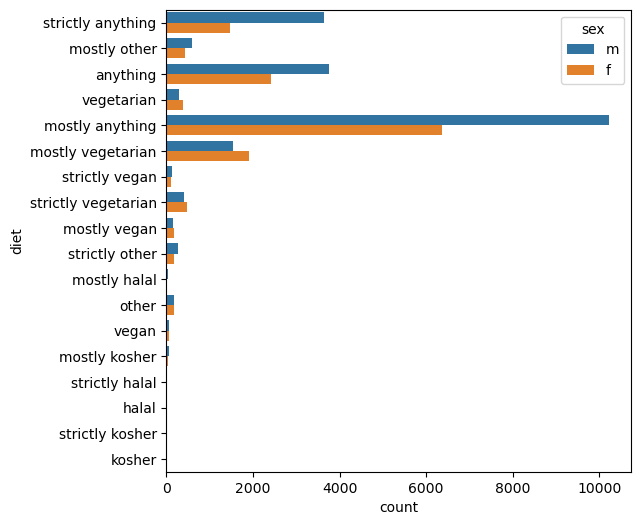

In [17]:
sns.countplot(data=profiles, y="diet", hue = "sex");

#### Drinks

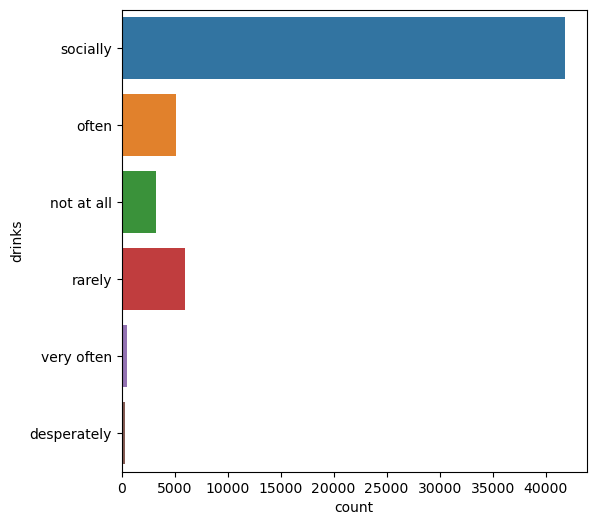

In [18]:
sns.countplot(data=profiles, y="drinks");

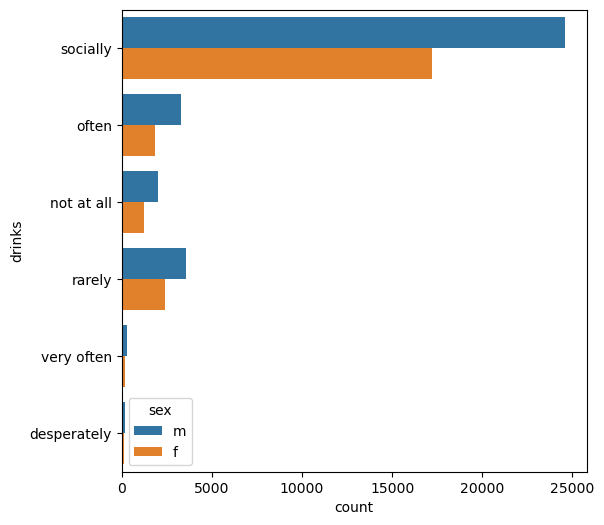

In [19]:
sns.countplot(data=profiles, y="drinks", hue = "sex");

#### Drugs

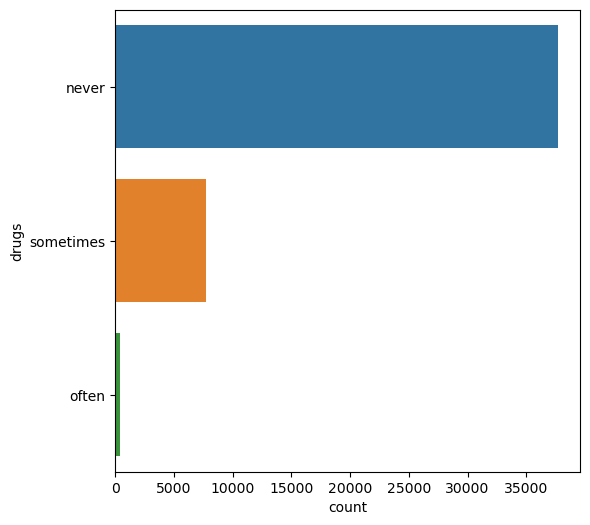

In [20]:
sns.countplot(data=profiles, y="drugs");

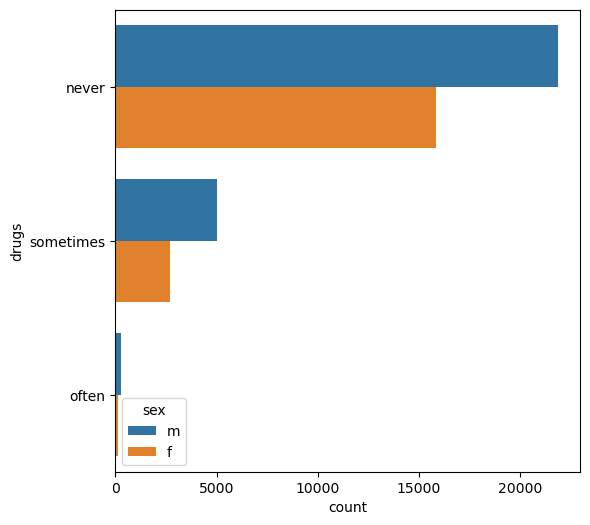

In [21]:
sns.countplot(data=profiles, y="drugs", hue = "sex");

#### Education

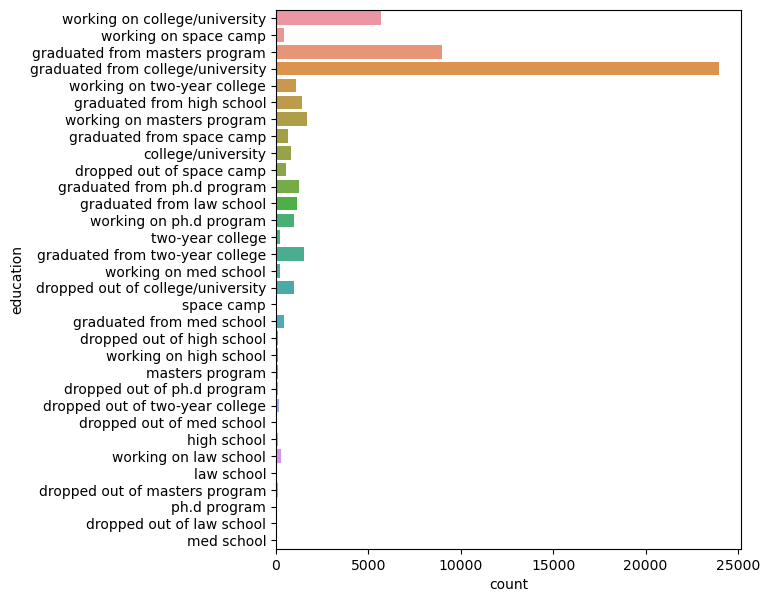

In [22]:
plt.figure(figsize=(6,7))
sns.countplot(data=profiles, y="education");

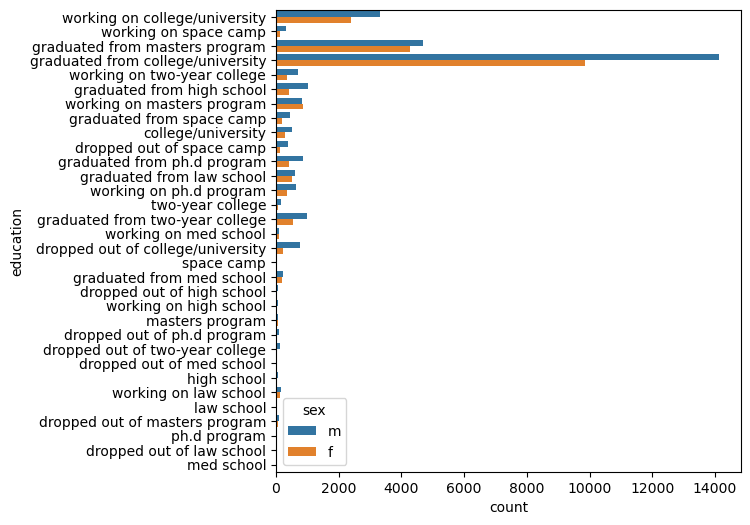

In [23]:
sns.countplot(data=profiles, y="education", hue = "sex");

#### Job

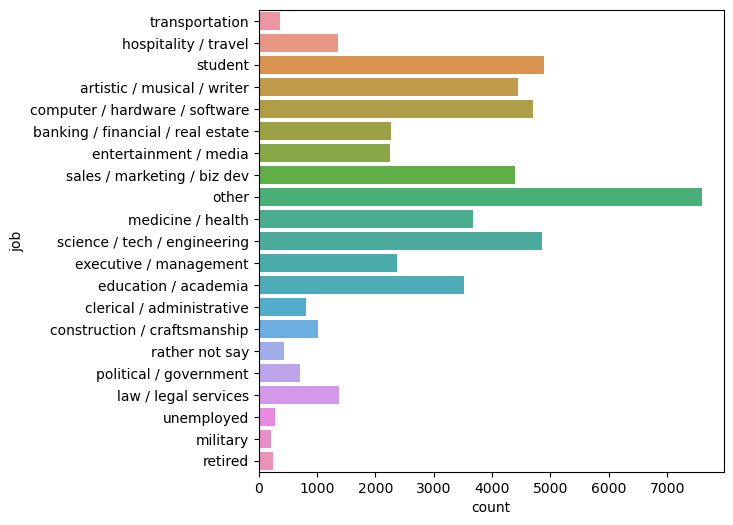

In [24]:
sns.countplot(data=profiles, y="job");

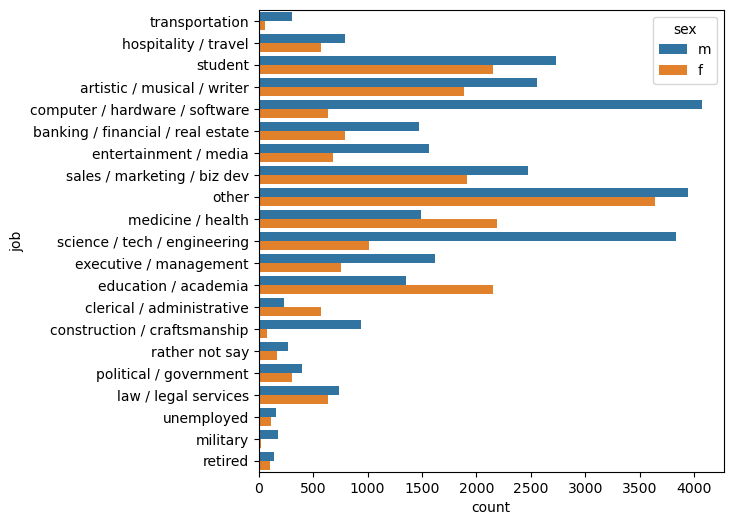

In [25]:
sns.countplot(data=profiles, y="job", hue = "sex");

#### Offspring

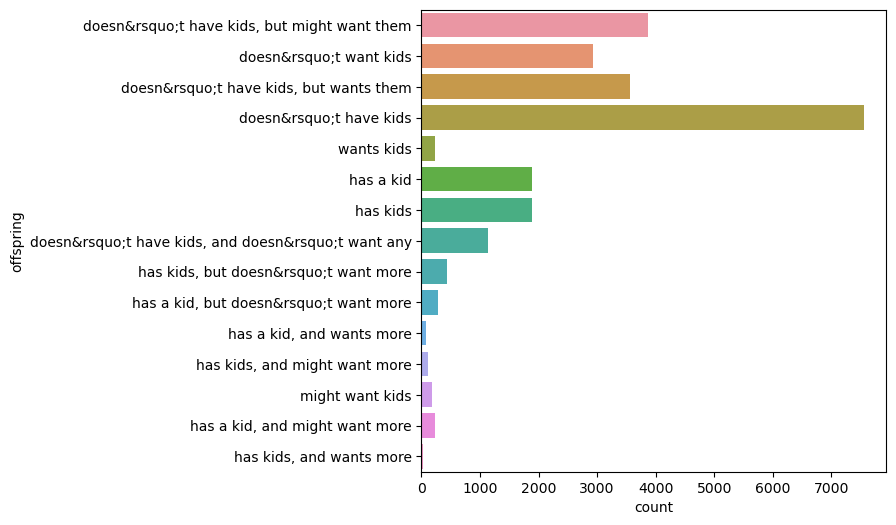

In [26]:
sns.countplot(data=profiles, y="offspring");

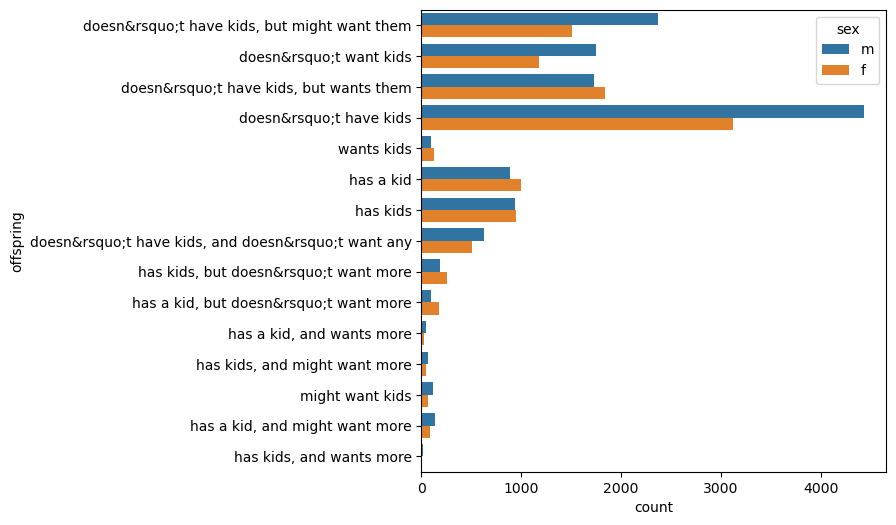

In [27]:
sns.countplot(data=profiles, y="offspring", hue = "sex");

#### Orientation

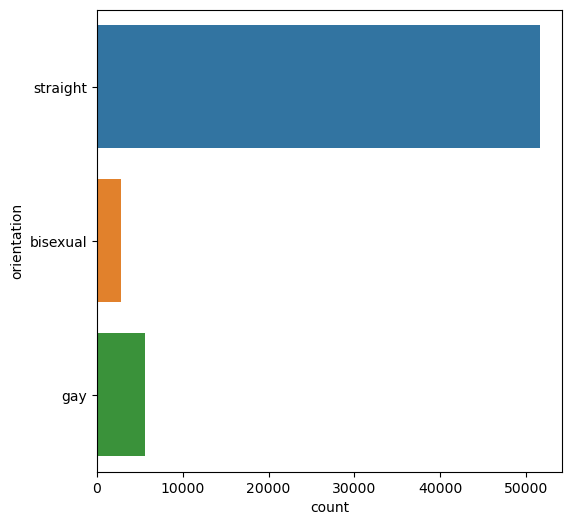

In [28]:
sns.countplot(data=profiles, y="orientation");

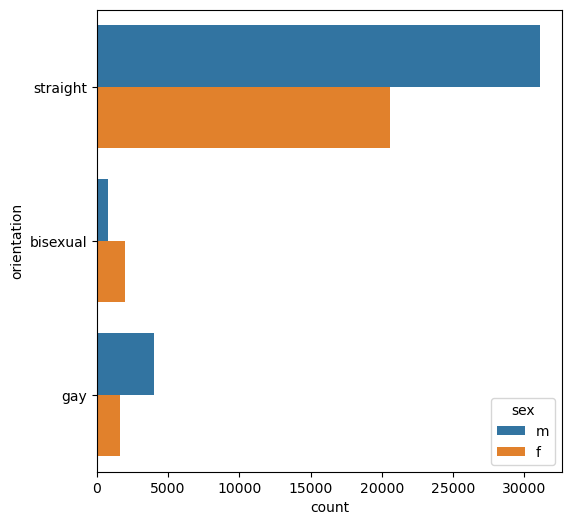

In [29]:
sns.countplot(data=profiles, y="orientation", hue = "sex");

#### Pets

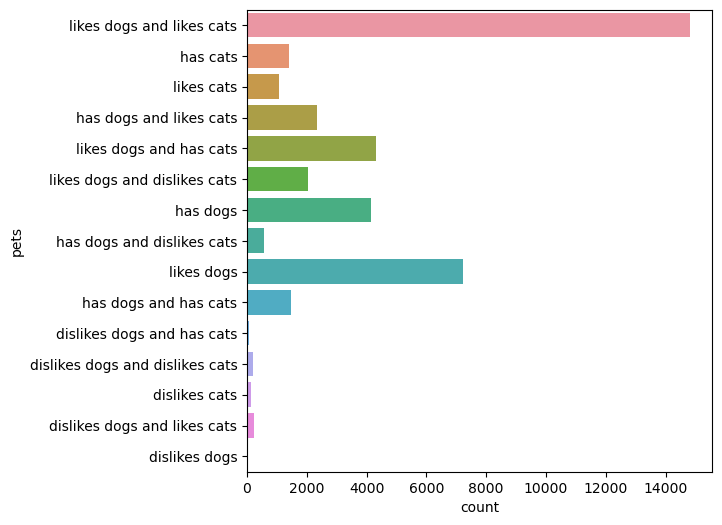

In [30]:
sns.countplot(data=profiles, y="pets");

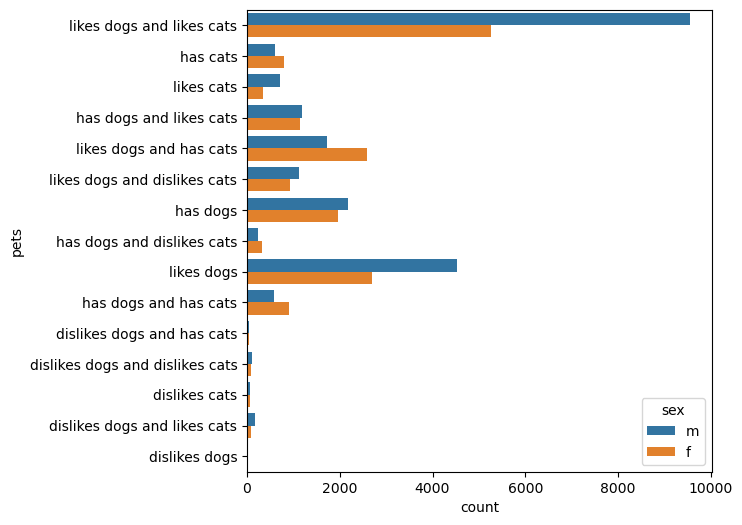

In [31]:
sns.countplot(data=profiles, y="pets", hue = "sex");

#### Religion

Similar to the Sign variable, the values in the **`Religion`** field were a combination of a religion and a qualifier (ie. how serious their religion was to them). With the qualifier included, the number of distinct number of values in the variable was too high to be of much help. The chart below shows an example. 

Therefore in the second chart the qualifiers have been removed as to show only distinct religions without the importance it has to the user.

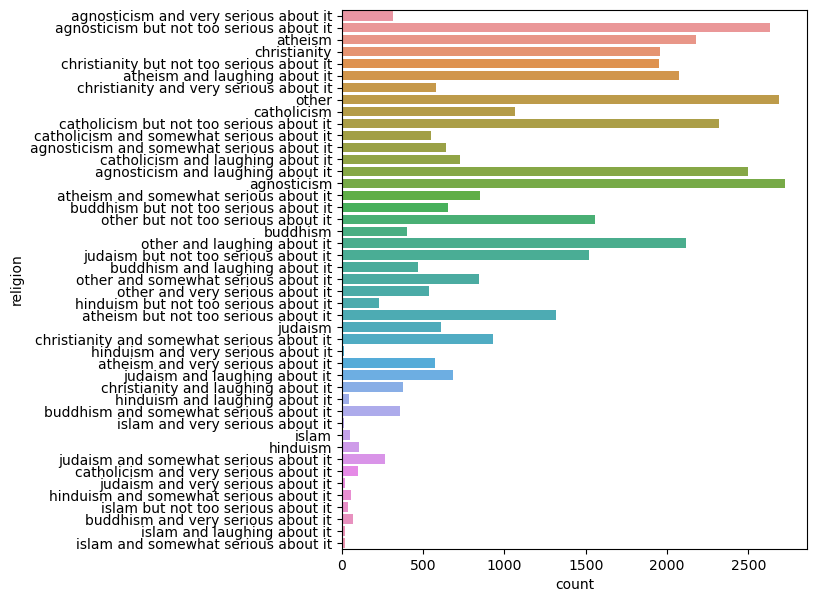

In [32]:
plt.figure(figsize=(6,7))
sns.countplot(data=profiles, y="religion");

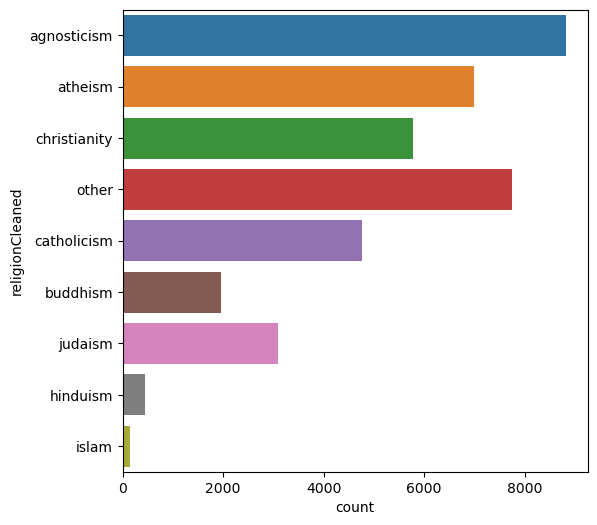

In [33]:
profiles['religionCleaned'] = profiles.religion.str.split().str.get(0)
sns.countplot(data=profiles, y="religionCleaned");

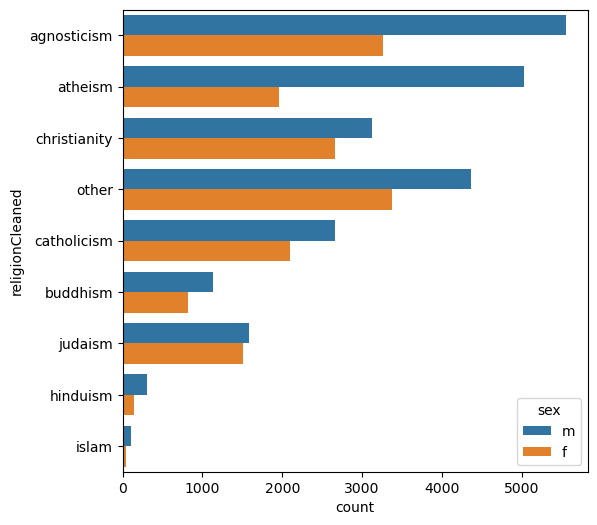

In [34]:
sns.countplot(data=profiles, y="religionCleaned", hue = "sex");

#### Smokes

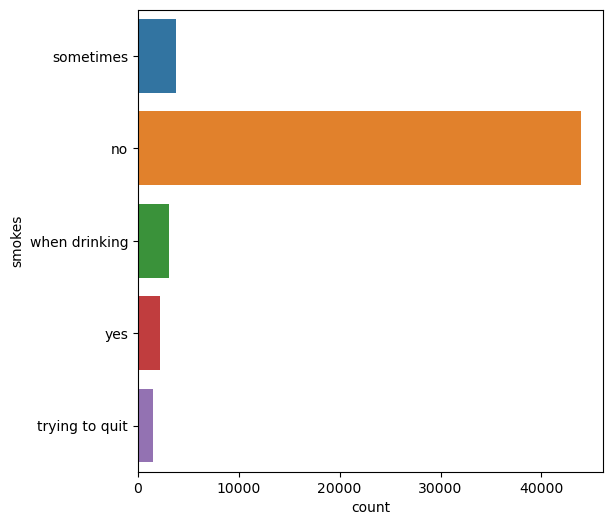

In [35]:
sns.countplot(data=profiles, y="smokes");

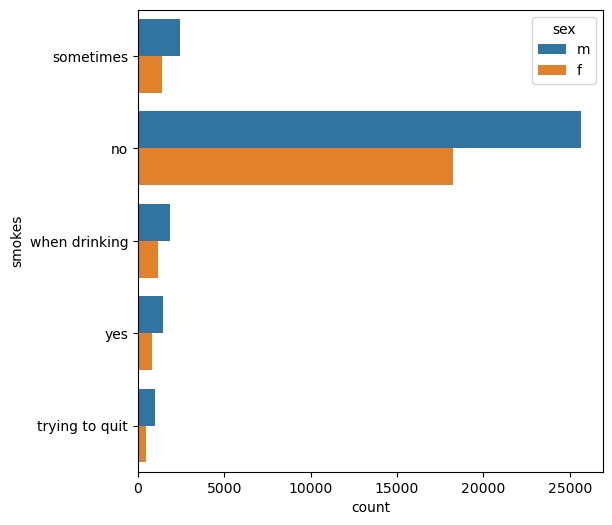

In [36]:
sns.countplot(data=profiles, y="smokes", hue = "sex");

#### Status

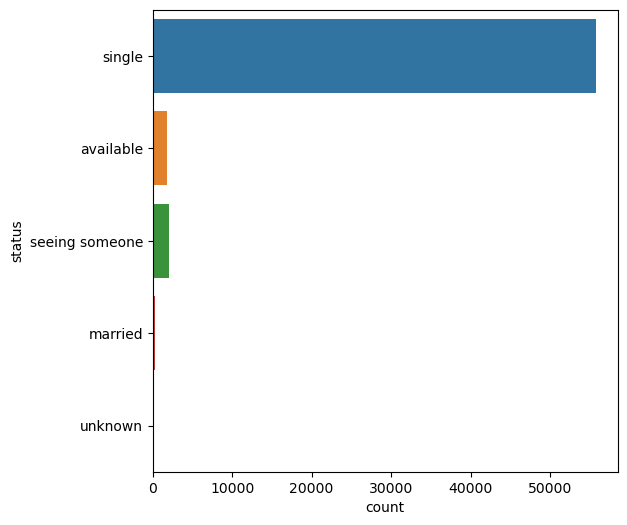

In [37]:
sns.countplot(data=profiles, y="status");

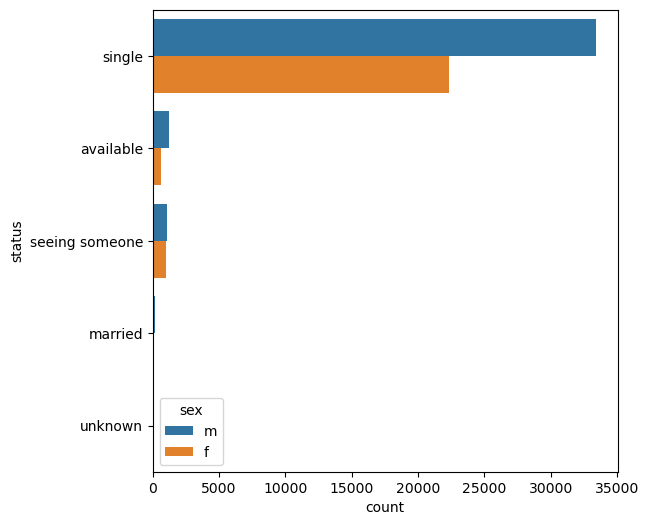

In [38]:
sns.countplot(data=profiles, y="status", hue = "sex");

## Data Preperation

### Missing Data

Machine learning algorithms rely on accurate data inputs. In the next section we will focus on cleaning the data, and handling missing values.

As mentioned before, only 7 of the fields in the dataset had zero null values. The breakdown of null values in each field is shown below:

In [39]:
profiles.isnull().sum()

age                    0
body_type           5296
diet               24395
drinks              2985
drugs              14080
education           6628
essay0              5488
essay1              7572
essay2              9638
essay3             11476
essay4             10537
essay5             10850
essay6             13771
essay7             12451
essay8             19225
essay9             12603
ethnicity           5680
height                 3
income                 0
job                 8198
last_online            0
location               0
offspring          35561
orientation            0
pets               19921
religion           20226
sex                    0
sign               11056
smokes              5512
speaks                50
status                 0
signsCleaned       11056
religionCleaned    20226
dtype: int64

### Pre-Processing 

Preparing the data for modeling is important since it can speed up the process and produce better results.

For this model we will use a subset of the fields in the dataset for the inputs. These variables are: 
- Body Type
- Diet
- Job
- Orientation
- Pets
- Religion (ie. 'religionCleaned')
- Sex
- Sign (ie. 'signCleaned')

These variables were selected because they may be goods predictor of astrological signs where as other variables, such as 'Age', are likely not good predictors. 

Next, null values are dropped to create a dataset with zero missing values.

In [40]:
cols = ['body_type', 'diet', 'orientation', 'pets', 'religionCleaned',
       'sex', 'job', 'signsCleaned']
df = profiles[cols].dropna()
df.shape

(16453, 8)

### Dummy Variables

In this next step, dummy variables are created to deal with the categorical variables. Dummy variables will turn the categories per variable into their own binary identifier. The data now has 81 columns to predict signs. 

In [41]:
for col in cols[:-1]:
    df = pd.get_dummies(df, columns=[col], prefix = [col])

In [42]:
df.head()

,signsCleaned,body_type_a little extra,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_full figured,body_type_jacked,body_type_overweight,body_type_rather not say,...,job_military,job_other,job_political / government,job_rather not say,job_retired,job_sales / marketing / biz dev,job_science / tech / engineering,job_student,job_transportation,job_unemployed
0,gemini,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,cancer,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,taurus,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,sagittarius,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,cancer,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


### Label Imbalance

An imbalance in the prediction label needs to be checked. This is important since it's a multi-class problem where two or more outcomes can be had. An imbalance in a response variable is bad since it means that some labels only occur a few times. This is an issue for machine learning algorithms if there are not enough data to train with which will give bad predictions. 

In the given dataset, we observe that the counts of all the zodiac signs are more or less equal (i.e., without large deviations). Hence, we do not have to worry about imbalances and trying to address this problem.

In [43]:
df.signsCleaned.value_counts()

signsCleaned
leo            1516
gemini         1496
cancer         1457
virgo          1451
taurus         1390
scorpio        1356
libra          1354
pisces         1334
aries          1328
sagittarius    1312
aquarius       1262
capricorn      1197
Name: count, dtype: int64

### Splitting Data

Next the data needs to be split into train and validation sets. In this split 25% of the data is reserved for the final validation, while 75% is kept for training the model.

In [44]:
col_length = len(df.columns)

#Y is the target column, X has the rest
X = df.iloc[:, 1:col_length]
Y = df.iloc[:, 0:1]

#Validation chunk size
val_size = 0.25

#Split the data into chunks
from sklearn.model_selection import train_test_split 
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=val_size, random_state = 0)

#turn in to 1d arrays
Y_train = Y_train.to_numpy().ravel()
Y_val = Y_val.to_numpy().ravel()

## Prediction

### Model Building 

Now it's time to create the models. Here is a list of [Multi class models](https://scikit-learn.org/stable/modules/multiclass.html) available in scikit learn. For this project three common algorithms will be used to make predictions:
- Logic Regression
- Decision Trees
- K-Nearest Neighbors (KNN)

Below, the respective modules for Logistic Regression, Decision Trees, and KNN are loaded.

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#### Evaluation Metrics

In these models there are several values that can be derived. They are:
- **Accuracy** - the correct values divided by total values
- **Precision** - the True Positives divided by the sum of True Positives and False Negatives. So precision is the values of the true positives divided by the actual positive values.
- **Recall** - the True Positives divided by the sum of True Positives and False Positives. So recall is the values of the true positives divided by the positive guesses.
- **F1-score** - a blended score of precision and recall which balances both values.
- **Macro Avg** - the unweighted mean value of precision and recall. 
- **Weighted Avg** - the weighted mean value of precision and recall by the support values for each class.
- **Support** - the number of observations in class to predict.

### Logistic Regression

The first model uses logistic regression with the `multi_class="multinomial"` argument. Using `lr_model` predictions are created from the training dataset which is used to determine how well the model preformed.

The accuracy of the logistic regression model is 12%. This is better than a random guess (1 in 12 chance; ~8%) but still low (inaccurate).

In [46]:
lr_model = LogisticRegression(multi_class="multinomial").fit(X_train, Y_train)
lr_predictions = lr_model.predict(X_train)

In [47]:
from sklearn.metrics import classification_report
print(classification_report(Y_train, lr_predictions))

              precision    recall  f1-score   support

    aquarius       0.13      0.07      0.09       968
       aries       0.12      0.10      0.11       983
      cancer       0.13      0.24      0.17      1129
   capricorn       0.14      0.05      0.07       882
      gemini       0.12      0.15      0.13      1130
         leo       0.12      0.19      0.15      1121
       libra       0.11      0.08      0.09      1028
      pisces       0.11      0.09      0.10       997
 sagittarius       0.13      0.09      0.11       965
     scorpio       0.14      0.05      0.08      1001
      taurus       0.13      0.12      0.12      1045
       virgo       0.12      0.21      0.15      1090

    accuracy                           0.12     12339
   macro avg       0.12      0.12      0.11     12339
weighted avg       0.12      0.12      0.12     12339



### K Nearest Neighbor

The last model used is KNN. In the model the `KNeighborsClassifier` will take 20 of it's neighbors to predict the signs. The default value for `n_neighbors` is '5', which was kept. This number can be tuned later if needed. This model had a 33% accuracy which is a good sign.

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 5).fit(X_train, Y_train)
knn_predictions = knn_model.predict(X_train.values)
print(classification_report(Y_train, knn_predictions))

              precision    recall  f1-score   support

    aquarius       0.26      0.65      0.37       968
       aries       0.27      0.50      0.35       983
      cancer       0.27      0.41      0.33      1129
   capricorn       0.34      0.32      0.33       882
      gemini       0.37      0.34      0.35      1130
         leo       0.38      0.29      0.33      1121
       libra       0.39      0.26      0.31      1028
      pisces       0.40      0.25      0.31       997
 sagittarius       0.42      0.22      0.29       965
     scorpio       0.41      0.23      0.30      1001
      taurus       0.42      0.25      0.31      1045
       virgo       0.42      0.24      0.31      1090

    accuracy                           0.33     12339
   macro avg       0.36      0.33      0.32     12339
weighted avg       0.36      0.33      0.32     12339



### Decision Trees

Next the decision trees model is used. The default `max_depth` is set to `none` meaning the nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. 

The results of the model show a 78% accuracy.

In [49]:
cart_model = DecisionTreeClassifier().fit(X_train, Y_train) 
cart_predictions = cart_model.predict(X_train)
print(classification_report(Y_train, cart_predictions))

              precision    recall  f1-score   support

    aquarius       0.67      0.94      0.78       968
       aries       0.66      0.88      0.75       983
      cancer       0.71      0.86      0.77      1129
   capricorn       0.74      0.84      0.79       882
      gemini       0.78      0.79      0.79      1130
         leo       0.80      0.80      0.80      1121
       libra       0.79      0.76      0.78      1028
      pisces       0.82      0.74      0.78       997
 sagittarius       0.91      0.70      0.79       965
     scorpio       0.89      0.71      0.79      1001
      taurus       0.93      0.70      0.80      1045
       virgo       0.94      0.67      0.78      1090

    accuracy                           0.78     12339
   macro avg       0.80      0.78      0.78     12339
weighted avg       0.80      0.78      0.78     12339



Below is a confusion matrix of the results with the true values on the y axis and predicted values along the x axis. Since the diagonals are lighter in color and have higher numbers, the accuracy is going to be high since those are the True Positives.

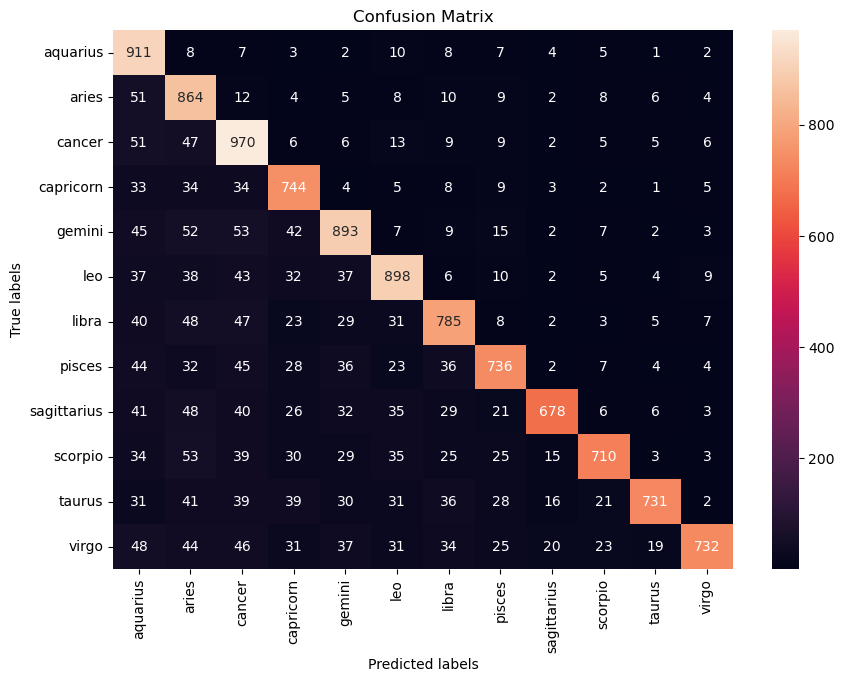

In [50]:
# import the Confusion Matrix library
from sklearn.metrics import confusion_matrix 

# set variables
cart_cm = confusion_matrix(Y_train, cart_predictions)
cart_labels = cart_model.classes_

# Plot the Confusion Matrix as a heat map
plt.figure(figsize=(10,7))
ax= plt.subplot()
sns.heatmap(cart_cm, annot=True, ax = ax,fmt="d");

# labels, title and ticks on the heat map
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');

ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(cart_labels); 
ax.yaxis.set_ticklabels(cart_labels);

Going back to the model, a quick analysis will show that this tree model has a depth of 49 branches, which will probably not generalize to another dataset. In this case this model has been "overfit" for this data.

In [51]:
cart_model.get_depth()

49

To make a point, a five-fold cross validation is created with the same data. The results are worse than the KNN and about the same as the Logistic Regression algorithms, as the baseline was ~9%.

In [52]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=5, shuffle=True, random_state=0)
results = cross_val_score(cart_model, X_train, Y_train, cv=kfold, scoring='accuracy')

print(results)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

[0.08711507 0.09278768 0.08873582 0.10170178 0.09160924]
Baseline: 9.24% (0.51%)


The decision tree model will be made it again, but with a `max_depth` of 20 to stop the algorithm from reaching the stopping point. The new accuracy rate of ~41% is worse than the first iteration, but slightly better than the KNN model.

In [53]:
cart_model20 = DecisionTreeClassifier(max_depth = 20).fit(X_train, Y_train) 
cart_predictions20 = cart_model20.predict(X_train)
print(classification_report(Y_train, cart_predictions20))

              precision    recall  f1-score   support

    aquarius       0.57      0.40      0.47       968
       aries       0.43      0.43      0.43       983
      cancer       0.37      0.50      0.42      1129
   capricorn       0.53      0.42      0.47       882
      gemini       0.41      0.44      0.42      1130
         leo       0.36      0.48      0.41      1121
       libra       0.29      0.42      0.34      1028
      pisces       0.61      0.34      0.44       997
 sagittarius       0.65      0.33      0.44       965
     scorpio       0.36      0.39      0.38      1001
      taurus       0.53      0.39      0.45      1045
       virgo       0.32      0.40      0.36      1090

    accuracy                           0.41     12339
   macro avg       0.45      0.41      0.42     12339
weighted avg       0.45      0.41      0.42     12339



If we check again with cross validation, the new model is still averaging ~8% which is not very good.

In [54]:
results20 = cross_val_score(cart_model20, X_train, Y_train, cv=kfold, scoring='accuracy')

print(results20)
print("Baseline: %.2f%% (%.2f%%)" % (results20.mean()*100, results.std()*100))

[0.07779579 0.08508914 0.08792545 0.0834684  0.08958249]
Baseline: 8.48% (0.51%)


# Conclusions

The project will conclude with the evaluation of the machine learning model selected with a validation dataset. The output of the predictions can be checked through a confusion matrix, and metrics such as accuracy, precision, recall, F1 and Kappa scores.